In [ ]:
!unzip Image.zip

Archive:  Image.zip
   creating: Image/[2, 1, 0.5]/
   creating: Image/[2, 1, 0.5]/3/
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_1.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_10.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_11.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_12.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_13.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_14.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_15.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_16.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_2.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_3.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR02136_SR3_4.jpg  
  inflating: Image/[2, 1, 0.5]/3/FEREIDONI A EBRAHIM_9603MR0

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_dir = "Image/"

patients = os.listdir(data_dir)

X_data = []
y_data = []

for patient in patients:
    tumor_sizes = os.listdir(os.path.join(data_dir, patient))

    for tumor_size in tumor_sizes:
        images = os.listdir(os.path.join(data_dir, patient, tumor_size))

        for image in images:
            img_path = os.path.join(data_dir, patient, tumor_size, image)
            img = load_img(img_path, target_size=(256, 256))
            img_array = img_to_array(img)
            img_array /= 255.0  # Normalize pixel values
            X_data.append(img_array)
            y_data.append(tumor_size)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/100
14/14 [==============================] - 3s 150ms/step - loss: 1.5558 - accuracy: 0.3499 - val_loss: 1.3789 - val_accuracy: 0.4084
Epoch 2/100
14/14 [==============================] - 1s 102ms/step - loss: 1.3758 - accuracy: 0.3995 - val_loss: 1.2786 - val_accuracy: 0.4346
Epoch 3/100
14/14 [==============================] - 1s 90ms/step - loss: 1.1911 - accuracy: 0.4989 - val_loss: 1.1648 - val_accuracy: 0.5131
Epoch 4/100
14/14 [==============================] - 1s 84ms/step - loss: 1.0415 - accuracy: 0.5418 - val_loss: 1.0874 - val_accuracy: 0.5079
Epoch 5/100
14/14 [==============================] - 1s 93ms/step - loss: 0.8671 - accuracy: 0.6591 - val_loss: 0.9534 - val_accuracy: 0.6440
Epoch 6/100
14/14 [==============================] - 1s 81ms/step - loss: 0.7115 - accuracy: 0.7201 - val_loss: 0.9233 - val_accuracy: 0.6492
Epoch 7/100
14/14 [==============================] - 1s 102ms/step - loss: 0.6272 - accuracy: 0.7562 - val_loss: 0.8165 - val_accuracy: 0.7225
Epo

6/6 [==============================] - 0s 27ms/step


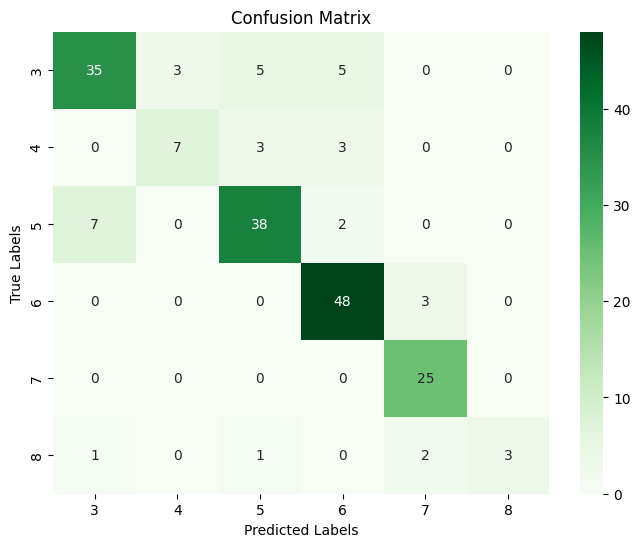

In [ ]:
y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test_labels, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('CM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

new_image_path = "example.jpg"
new_img = load_img(new_image_path, target_size=(256, 256))
new_img_array = img_to_array(new_img)
new_img_array /= 255.0
input_img = np.expand_dims(new_img_array, axis=0)
predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions)

class_to_folder_mapping = {0: [2, 2, 1],
                           1: [2, 1, 1],
                           2: [4, 2, 1.5],
                           3: [4.5, 4, 2],
                           4: [5, 3.5, 2.5],
                           5: [6, 4.5, 2.5],
                           6: [7, 4, 1.5],
                           7: [7, 5.5, 2.5],
                           8: [2, 1, 0.5],
                           9: [4, 3, 1],
                           10: [5, 4, 1]}

predicted_class_folder = class_to_folder_mapping[predicted_class_index]
print(f"The predicted class corresponds to the folder: {predicted_class_folder}")

1/1 [==============================] - 0s 43ms/step
The predicted class corresponds to the folder: [4, 2, 1.5]
